In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix as cm#Evaluation
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier as dtc # Decision tree algorithm
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.metrics import f1_score#Evaluation
from sklearn.preprocessing import StandardScaler # data normalization
import pickle

In [5]:
cd = pd.read_csv('creditcard.csv')

In [6]:
cd.head().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


In [7]:
cd.tail().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.000000,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,172787.000000,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000,0
284804,172788.000000,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000,0
284805,172788.000000,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0
284806,172792.000000,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.000000,0


In [8]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
cd.describe().style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,1.088850,1.020713,0.999201,0.995274,0.958596,0.915316,0.876253,0.849337,0.838176,0.814041,0.770925,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,-0.535426,-0.762494,-0.405571,-0.648539,-0.425574,-0.582884,-0.468037,-0.483748,-0.498850,-0.456299,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,-0.092917,-0.032757,0.140033,-0.013568,0.050601,0.048072,0.066413,-0.065676,-0.003636,0.003735,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,0.453923,0.739593,0.618238,0.662505,0.493150,0.648821,0.523296,0.399675,0.500807,0.458949,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [10]:
cd.values

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

In [11]:
#data cleaning
cd.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
cd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
cd['Class'].fillna(cd['Class'].mean()) # dealing with missing values
cd['Class'].fillna(cd['Class'].median())

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [14]:
cd['Amount'].fillna(cd['Amount'].mode()[0])

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

C:\Users\Abhiram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


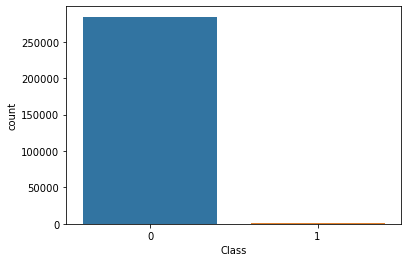

In [15]:
sns.countplot(cd["Class"]);

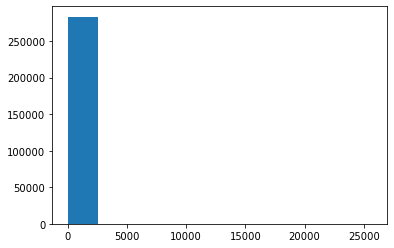

In [45]:
plt.hist(data['Amount']);

C:\Users\Abhiram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


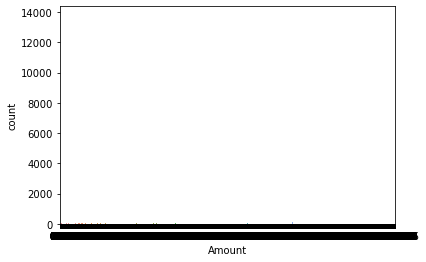

In [22]:
sns.countplot(cd["Amount"]);

In [16]:
cd.duplicated().any()

True

In [17]:
cd.shape

(284807, 31)

In [18]:
cd["Amount"].sum()

25162590.009999998

In [19]:
# Remove duplication
data= cd.drop_duplicates()

In [20]:
cd['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [21]:
data.duplicated().any()

False

In [23]:
cd.shape

(283726, 31)

In [47]:
legit = cd[cd.Class==0]
fraud = cd[cd.Class==1]
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [48]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [49]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [50]:
cd.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [51]:
legit_sample = legit.sample(n=492)
new_cd = pd.concat([legit_sample,fraud],axis = 0)
new_cd.head()
new_cd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [52]:
new_cd['Class'].value_counts()
new_cd.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94454.558943,0.097552,0.027021,-0.031752,-0.062246,0.011843,-0.021259,0.041381,0.014126,-0.076249,...,-0.005710,-0.011497,0.010527,0.005725,-0.003397,-0.015099,-0.022815,-0.002741,0.004172,82.882500
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [53]:
X = new_cd.drop(columns = 'Class',axis = 1)
Y = new_cd['Class']
print(X)
print(Y)

            Time        V1        V2        V3        V4        V5        V6  \
12126    21108.0 -0.929879  0.168893  2.728816  3.561186 -0.076888  0.555259   
55434    46938.0 -0.940826  0.793784  0.418634  0.822638  0.681966  0.689998   
217206  140805.0 -0.615392  0.795685 -0.481423  0.890839  0.443622  0.176117   
164032  116407.0  1.990689 -0.230652 -0.453525  0.305427 -0.264612 -0.148375   
162775  115359.0 -0.474564  1.081039 -0.948067 -0.976899  1.555452  1.305063   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [54]:
fraud,legitimate = cd['Class'].value_counts()

print(f"Fraud Transaction(0): {fraud}")
print(f"Legitimate Transaction (1): {legitimate}")
print(f"This is imbalnce data")

Fraud Transaction(0): 284315
Legitimate Transaction (1): 492
This is imbalnce data


In [55]:
fraud = cd[cd['Class']==0]
legitimate = cd[cd['Class']==1]

In [56]:
fraud.value_counts()

Time      V1         V2         V3         V4         V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28        Amount  Class
163152.0  -1.196037   1.585949   2.883976   3.378471   1.511706   3.717077   0.585362  -0.156001   0.122648   4.217934   1.385525  -0.709405  -0.256168  -1.564352   1.693218  -0.785210  -0.228008  -0.412833   0.234834   1.375790  -0.370294   0.524395  -0.355170  -0.869790  -0.133198   0.327804  -0.035702  -0.858197  7.56    0        18
          -1.203617   1.574009   2.889277   3.381404   1.538663   3.698747   0.560211  -0.150911   0.124136   4.220998   1.384569  -0.706897  -0.256274  -1.562583   1.692915  -0.787338  -0.226776  -0.412354   0.234322   1.385597  -0.366727   0.522223  -0.357329  -0.870174  -0.134166   0.327019  -0.042648  -0.855262  1.51    0   

In [57]:
legitimate.value_counts()

Time      V1          V2         V3          V4        V5          V6         V7          V8          V9         V10         V11        V12         V13        V14         V15        V16         V17         V18        V19        V20        V21         V22        V23        V24        V25        V26        V27        V28        Amount  Class
68207.0   -13.192671  12.785971  -9.906650   3.320337  -4.801176    5.760059  -18.750889  -37.353443  -0.391540  -5.052502    4.406806  -4.610756   -1.909488  -9.072711   -0.226074  -6.211557   -6.248145   -3.149247   0.051576  -3.493050   27.202839  -8.887017   5.303607  -0.639435   0.263203  -0.108877   1.269566   0.939407  1.00    1        6
94362.0   -26.457745  16.497472  -30.177317  8.904157  -17.892600  -1.227904  -31.197329  -11.438920  -9.462573  -22.187089   4.419997  -10.592305  -0.703796  -3.926207   -2.400246  -6.809890   -12.462315  -5.501051  -0.567940   2.812241  -8.755698    3.460893   0.896538   0.254836  -0.738097  -0.966564  -7.26

In [58]:
 #Handling Imbalanced Data

In [59]:
X.shape

(984, 30)

In [61]:
Y.shape

(984,)

In [62]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, classification_report
# from tabulate import tabulate

In [63]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
12126    21108.0 -0.929879  0.168893  2.728816  3.561186 -0.076888  0.555259   
55434    46938.0 -0.940826  0.793784  0.418634  0.822638  0.681966  0.689998   
217206  140805.0 -0.615392  0.795685 -0.481423  0.890839  0.443622  0.176117   
164032  116407.0  1.990689 -0.230652 -0.453525  0.305427 -0.264612 -0.148375   
162775  115359.0 -0.474564  1.081039 -0.948067 -0.976899  1.555452  1.305063   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [64]:
print(Y)

12126     0
55434     0
217206    0
164032    0
162775    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [65]:
X_train,X_test,Y_train,Y_test = tts(X,Y,test_size = 0.2,stratify = Y , random_state = 2)

In [67]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [68]:
print(Y.shape,Y_train.shape,Y_test.shape)

(984,) (787,) (197,)


In [69]:
lr_model = lr()


In [70]:
lr_model.fit(X_train,Y_train)


C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
lr_X_train_prediction = lr_model.predict(X_train)
lr_training_data_accuracy = accuracy_score(lr_X_train_prediction,Y_train)
lr_training_data_f1_score = f1_score(lr_X_train_prediction,Y_train)
lr_training_data_confusion_matrix = cm(lr_X_train_prediction,Y_train)

In [72]:
print('Accuracy on lr Training data :',lr_training_data_accuracy)
print("F1 score on lr Training Data :" , lr_training_data_f1_score)
print("Confusion Matrix on lr training data:",lr_training_data_confusion_matrix)


Accuracy on lr Training data : 0.9428208386277002
F1 score on lr Training Data : 0.942084942084942
Confusion Matrix on lr training data: [[376  28]
 [ 17 366]]


In [73]:
lr_X_test_prediction = lr_model.predict(X_test)
lr_testing_data_accuracy = accuracy_score(lr_X_test_prediction,Y_test)
lr_testing_data_f1_score = f1_score(lr_X_test_prediction,Y_test)
24
lr_testing_data_confusion_matrix = cm(lr_X_test_prediction,Y_test)

In [74]:
print("Accuracy on lr Testing Data :",lr_testing_data_accuracy)
print("f1_score on lr Testing Data :",lr_testing_data_f1_score)
print("Confusion Matrix on lr Testing Data:",lr_testing_data_confusion_matrix)


Accuracy on lr Testing Data : 0.9441624365482234
f1_score on lr Testing Data : 0.9417989417989417
Confusion Matrix on lr Testing Data: [[97  9]
 [ 2 89]]


In [75]:
dtc_model = dtc()

In [76]:
dtc_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [77]:
dtc_X_train_prediction = dtc_model.predict(X_train)
dtc_training_data_accuracy = accuracy_score(dtc_X_train_prediction,Y_train)
dtc_training_data_f1_score = f1_score(dtc_X_train_prediction,Y_train)
dtc_training_data_confusion_matrix = cm(dtc_X_train_prediction,Y_train)


In [78]:
print("Accuracy on dtc Training Data:",dtc_training_data_accuracy)
print("f1_score on dtc Training Data:",dtc_training_data_f1_score)
print("Confusion Matrix on dtc Training Data:",dtc_training_data_confusion_matrix)

Accuracy on dtc Training Data: 1.0
f1_score on dtc Training Data: 1.0
Confusion Matrix on dtc Training Data: [[393   0]
 [  0 394]]


In [79]:
dtc_X_test_prediction = dtc_model.predict(X_test)
dtc_testing_data_accuracy = accuracy_score(dtc_X_test_prediction,Y_test)
dtc_testing_data_f1_score = f1_score(dtc_X_test_prediction,Y_test)
dtc_testing_data_confusion_matrix = cm(dtc_X_test_prediction,Y_test)

In [80]:
print("Accuracy on dtc testing Data:", dtc_testing_data_accuracy)
print("f1_score on dtc testing Data:", dtc_testing_data_f1_score)
print("Confusion Matrix on dtc testing data:",dtc_testing_data_confusion_matrix)


Accuracy on dtc testing Data: 0.9187817258883249
f1_score on dtc testing Data: 0.9157894736842105
Confusion Matrix on dtc testing data: [[94 11]
 [ 5 87]]


In [81]:
gnb_model = gnb()


In [82]:
gnb_model.fit(X_train,Y_train)

GaussianNB()

In [83]:
gnb_X_train_prediction = gnb_model.predict(X_train)
gnb_training_data_accuracy = accuracy_score(gnb_X_train_prediction,Y_train)
gnb_training_data_f1_score = f1_score(gnb_X_train_prediction,Y_train)
gnb_training_data_confusion_matrix = cm(gnb_X_train_prediction,Y_train)

In [84]:
print("Accuracy on gnb Training Data:",gnb_training_data_accuracy)
25
print("f1_score on gnb Training Data:",gnb_training_data_f1_score)
-print("Confusion Matrix on gnb Training Data:",gnb_training_data_confusion_matrix)


Accuracy on gnb Training Data: 0.866581956797967
f1_score on gnb Training Data: 0.8471615720524018
Confusion Matrix on gnb Training Data: [[391 103]
 [  2 291]]


TypeError: bad operand type for unary -: 'NoneType'

In [85]:
gnb_X_test_prediction = gnb_model.predict(X_test)
gnb_testing_data_accuracy = accuracy_score(gnb_X_test_prediction,Y_test)
gnb_testing_data_f1_score = f1_score(gnb_X_test_prediction,Y_test)
gnb_testing_data_confusion_matrix = cm(gnb_X_test_prediction,Y_test)

In [86]:
print("Accuracy on gnb testing Data:", gnb_testing_data_accuracy)
print("f1_score on gnb testing Data:", gnb_testing_data_f1_score)
print("Confusion Matrix on gnb testing Data:",gnb_testing_data_confusion_matrix)

Accuracy on gnb testing Data: 0.868020304568528
f1_score on gnb testing Data: 0.8488372093023255
Confusion Matrix on gnb testing Data: [[98 25]
 [ 1 73]]


In [87]:
pickle.dump(dtc_model,open('dtc_model.sav','wb'))



In [88]:
pickle.dump(lr_model,open('lr_model.sav','wb'))


In [89]:
pickle.dump(gnb_model,open('gnb_model.sav','wb'))


In [90]:
dtc_model = pickle.load(open('dtc_model.sav','rb'))


In [91]:
lr_model = pickle.load(open('lr_model.sav','rb'))


In [92]:
gnb_model = pickle.load(open('gnb_model.sav','rb'))

In [93]:
new_input = [[-1.358354 ,-1.340163, 1.773209, 0.379780, -0.503198 ,
1.800499, 0.791461, 0.247676, -1.514654 ,0.207643,
0.624501, 0.066084, 0.717293, -0.165946 ,2.345865 ,
-2.890083, 1.109969, -0.121359 ,-2.261857, 0.524980,
0.247998, 0.771679, 0.909412, -0.689281 ,-0.327642,
-0.139097 ,-0.055353, -0.059752 ,-0.385050,378.66]]
dtc_output = dtc_model.predict(new_input)
print(new_input, dtc_output)
print('\n')
if dtc_output==0:
 print('Decision Tree Model classifies the transaction as GENUINE ')
if dtc_output==1:
 print('Decision Tree Regression Model classifies the transaction as FRAUD ')

[[-1.358354, -1.340163, 1.773209, 0.37978, -0.503198, 1.800499, 0.791461, 0.247676, -1.514654, 0.207643, 0.624501, 0.066084, 0.717293, -0.165946, 2.345865, -2.890083, 1.109969, -0.121359, -2.261857, 0.52498, 0.247998, 0.771679, 0.909412, -0.689281, -0.327642, -0.139097, -0.055353, -0.059752, -0.38505, 378.66]] [0]


Decision Tree Model classifies the transaction as GENUINE 


C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [94]:
new_input = [[-0.623525 , 0.176955 , 2.565, 1.54428 , 0.109686 ,
0.055218, 0.259801, -0.192566 ,-0.320106 , 0.869786 ,
1.170672 , 0.490575 , 0.427361 ,-0.660374 ,-0.377799 ,
1.40579 ,-1.66726 , 0.887032 ,-1.786332, -0.074807 ,
0.3878 , 1.408297 , 0.019451 , 0.545551 ,-1.35758,
-0.332164 ,-0.13854, -0.200151,0.483331 , 67.1 ]]
dtc_output = dtc_model.predict(new_input)
print(new_input, dtc_output)
print('\n')
if dtc_output==0:
 print('Decision Tree Model classifies the transaction as GENUINE ')
if dtc_output==1:
 print('Decision Tree Regression Model classifies the transaction as FRAUD ')
print('\n')
lr_model_output = lr_model.predict(new_input)
print(new_input, lr_model_output)
print('\n')
if lr_model_output==0:
 print('Logistic Regression Model classifies the transaction as GENUINE ')
if lr_model_output==1:
 print('Logistic Regression Model classifies the transaction as FRAUD ')
print('\n')
gnb_model_output = gnb_model.predict(new_input)
print(new_input, gnb_model_output)
print('\n')
if gnb_model_output==0:
 print('Naive Bayes Model classifies the transaction as GENUINE ')
if gnb_model_output==1:
 print('Naive Bayes Model classifies the transaction as FRAUD ')
print('\n')

[[-0.623525, 0.176955, 2.565, 1.54428, 0.109686, 0.055218, 0.259801, -0.192566, -0.320106, 0.869786, 1.170672, 0.490575, 0.427361, -0.660374, -0.377799, 1.40579, -1.66726, 0.887032, -1.786332, -0.074807, 0.3878, 1.408297, 0.019451, 0.545551, -1.35758, -0.332164, -0.13854, -0.200151, 0.483331, 67.1]] [0]


Decision Tree Model classifies the transaction as GENUINE 


[[-0.623525, 0.176955, 2.565, 1.54428, 0.109686, 0.055218, 0.259801, -0.192566, -0.320106, 0.869786, 1.170672, 0.490575, 0.427361, -0.660374, -0.377799, 1.40579, -1.66726, 0.887032, -1.786332, -0.074807, 0.3878, 1.408297, 0.019451, 0.545551, -1.35758, -0.332164, -0.13854, -0.200151, 0.483331, 67.1]] [0]


Logistic Regression Model classifies the transaction as GENUINE 


[[-0.623525, 0.176955, 2.565, 1.54428, 0.109686, 0.055218, 0.259801, -0.192566, -0.320106, 0.869786, 1.170672, 0.490575, 0.427361, -0.660374, -0.377799, 1.40579, -1.66726, 0.887032, -1.786332, -0.074807, 0.3878, 1.408297, 0.019451, 0.545551, -1.35758, -0.332

C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [95]:
new_input = [[ -0.338262 ,1.119593, 1.044367, -0.222187, 0.499361, 
 -0.246761, 0.651583, 0.069539, -0.736727, -0.366846, 
 1.017614, 0.836390, 1.006844, -0.443523, 0.150219, 
 0.739453, -0.540980, 0.476677, 0.451773, 0.203711, 
 -0.246914, -0.633753, -0.120794 ,-0.385050, -0.069733 ,
 0.094199, 0.246219, 0.083076, -0.385050 ,3.68]]
dtc_output = dtc_model.predict(new_input)
print(new_input, dtc_output)
print('\n')
if dtc_output==0:
 print('Decision Tree Model classifies the transaction as GENUINE ')
if dtc_output==1:
 print('Decision Tree Regression Model classifies the transaction as FRAUD ')
print('\n')
lr_model_output = lr_model.predict(new_input)
print(new_input, lr_model_output)
print('\n')
if lr_model_output==0:
 print('Logistic Regression Model classifies the transaction as GENUINE ')
if lr_model_output==1:
 print('Logistic Regression Model classifies the transaction as FRAUD ')
print('\n')
gnb_model_output = gnb_model.predict(new_input)
print(new_input, gnb_model_output)
print('\n')
if gnb_model_output==0:
 print('Naive Bayes Model classifies the transaction as GENUINE ')
if gnb_model_output==1:
 print('Naive Bayes Model classifies the transaction as FRAUD ')
print('\n')

[[-0.338262, 1.119593, 1.044367, -0.222187, 0.499361, -0.246761, 0.651583, 0.069539, -0.736727, -0.366846, 1.017614, 0.83639, 1.006844, -0.443523, 0.150219, 0.739453, -0.54098, 0.476677, 0.451773, 0.203711, -0.246914, -0.633753, -0.120794, -0.38505, -0.069733, 0.094199, 0.246219, 0.083076, -0.38505, 3.68]] [0]


Decision Tree Model classifies the transaction as GENUINE 


[[-0.338262, 1.119593, 1.044367, -0.222187, 0.499361, -0.246761, 0.651583, 0.069539, -0.736727, -0.366846, 1.017614, 0.83639, 1.006844, -0.443523, 0.150219, 0.739453, -0.54098, 0.476677, 0.451773, 0.203711, -0.246914, -0.633753, -0.120794, -0.38505, -0.069733, 0.094199, 0.246219, 0.083076, -0.38505, 3.68]] [0]


Logistic Regression Model classifies the transaction as GENUINE 


[[-0.338262, 1.119593, 1.044367, -0.222187, 0.499361, -0.246761, 0.651583, 0.069539, -0.736727, -0.366846, 1.017614, 0.83639, 1.006844, -0.443523, 0.150219, 0.739453, -0.54098, 0.476677, 0.451773, 0.203711, -0.246914, -0.633753, -0.120794, -0.3

C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [96]:
new_input = [[-1.358354 ,-1.340163, 1.773209, 0.379780, -0.503198 ,
 1.800499, 0.791461, 0.247676, -1.514654 ,0.207643, 
 0.624501, 0.066084, 0.717293, -0.165946 ,2.345865 ,
 -2.890083, 1.109969, -0.121359 ,-2.261857, 0.524980,
 0.247998, 0.771679, 0.909412, -0.689281 ,-0.327642, 
 -0.139097 ,-0.055353, -0.059752 ,-0.385050,378.66]]

dtc_output = dtc_model.predict(new_input)
print(new_input, dtc_output)
print('\n')
if dtc_output==0:
 print('Decision Tree Model classifies the transaction as GENUINE ')
if dtc_output==1:
 print('Decision Tree Regression Model classifies the transaction as FRAUD ')
print('\n')
lr_model_output = lr_model.predict(new_input)
print(new_input, lr_model_output)
print('\n')
if lr_model_output==0:
 print('Logistic Regression Model classifies the transaction as GENUINE ')
if lr_model_output==1:
 print('Logistic Regression Model classifies the transaction as FRAUD ')
print('\n')
gnb_model_output = gnb_model.predict(new_input)
print(new_input, gnb_model_output)
print('\n')
if gnb_model_output==0:
 print('Naive Bayes Model classifies the transaction as GENUINE ')
if gnb_model_output==1:
 print('Naive Bayes Model classifies the transaction as FRAUD ')

print('\n')

[[-1.358354, -1.340163, 1.773209, 0.37978, -0.503198, 1.800499, 0.791461, 0.247676, -1.514654, 0.207643, 0.624501, 0.066084, 0.717293, -0.165946, 2.345865, -2.890083, 1.109969, -0.121359, -2.261857, 0.52498, 0.247998, 0.771679, 0.909412, -0.689281, -0.327642, -0.139097, -0.055353, -0.059752, -0.38505, 378.66]] [0]


Decision Tree Model classifies the transaction as GENUINE 


[[-1.358354, -1.340163, 1.773209, 0.37978, -0.503198, 1.800499, 0.791461, 0.247676, -1.514654, 0.207643, 0.624501, 0.066084, 0.717293, -0.165946, 2.345865, -2.890083, 1.109969, -0.121359, -2.261857, 0.52498, 0.247998, 0.771679, 0.909412, -0.689281, -0.327642, -0.139097, -0.055353, -0.059752, -0.38505, 378.66]] [0]


Logistic Regression Model classifies the transaction as GENUINE 


[[-1.358354, -1.340163, 1.773209, 0.37978, -0.503198, 1.800499, 0.791461, 0.247676, -1.514654, 0.207643, 0.624501, 0.066084, 0.717293, -0.165946, 2.345865, -2.890083, 1.109969, -0.121359, -2.261857, 0.52498, 0.247998, 0.771679, 0.909412

C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [97]:
new_input = [[-0.623525 , 0.176955 , 2.565, 1.54428 , 0.109686 ,
 0.055218, 0.259801, -0.192566 ,-0.320106 , 0.869786 , 
 1.170672 , 0.490575 , 0.427361 ,-0.660374 ,-0.377799 ,
 1.40579 ,-1.66726 , 0.887032 ,-1.786332, -0.074807 ,
 0.3878 , 1.408297 , 0.019451 , 0.545551 ,-1.35758, 
 -0.332164 ,-0.13854, -0.200151,0.483331 , 67.1 ]]
dtc_output = dtc_model.predict(new_input)
print(new_input, dtc_output)
print('\n')
if dtc_output==0:
 print('Decision Tree Model classifies the transaction as GENUINE ')
if dtc_output==1:
 print('Decision Tree Regression Model classifies the transaction as FRAUD ')
print('\n')
lr_model_output = lr_model.predict(new_input)
print(new_input, lr_model_output)
print('\n')
if lr_model_output==0:
 print('Logistic Regression Model classifies the transaction as GENUINE ')
if lr_model_output==1:
 print('Logistic Regression Model classifies the transaction as FRAUD ')
print('\n')
gnb_model_output = gnb_model.predict(new_input)
print(new_input, gnb_model_output)
print('\n')
if gnb_model_output==0:
 print('Naive Bayes Model classifies the transaction as GENUINE ')
if gnb_model_output==1:
 print('Naive Bayes Model classifies the transaction as FRAUD ')

print('\n')



[[-0.623525, 0.176955, 2.565, 1.54428, 0.109686, 0.055218, 0.259801, -0.192566, -0.320106, 0.869786, 1.170672, 0.490575, 0.427361, -0.660374, -0.377799, 1.40579, -1.66726, 0.887032, -1.786332, -0.074807, 0.3878, 1.408297, 0.019451, 0.545551, -1.35758, -0.332164, -0.13854, -0.200151, 0.483331, 67.1]] [0]


Decision Tree Model classifies the transaction as GENUINE 


[[-0.623525, 0.176955, 2.565, 1.54428, 0.109686, 0.055218, 0.259801, -0.192566, -0.320106, 0.869786, 1.170672, 0.490575, 0.427361, -0.660374, -0.377799, 1.40579, -1.66726, 0.887032, -1.786332, -0.074807, 0.3878, 1.408297, 0.019451, 0.545551, -1.35758, -0.332164, -0.13854, -0.200151, 0.483331, 67.1]] [0]


Logistic Regression Model classifies the transaction as GENUINE 


[[-0.623525, 0.176955, 2.565, 1.54428, 0.109686, 0.055218, 0.259801, -0.192566, -0.320106, 0.869786, 1.170672, 0.490575, 0.427361, -0.660374, -0.377799, 1.40579, -1.66726, 0.887032, -1.786332, -0.074807, 0.3878, 1.408297, 0.019451, 0.545551, -1.35758, -0.332

C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [98]:
new_input = [[ -0.338262 ,1.119593, 1.044367, -0.222187, 0.499361, 
 -0.246761, 0.651583, 0.069539, -0.736727, -0.366846, 
 1.017614, 0.836390, 1.006844, -0.443523, 0.150219, 
 0.739453, -0.540980, 0.476677, 0.451773, 0.203711, 
 -0.246914, -0.633753, -0.120794 ,-0.385050, -0.069733 ,
 0.094199, 0.246219, 0.083076, -0.385050 ,3.68]]
dtc_output = dtc_model.predict(new_input)
print(new_input, dtc_output)
print('\n')
if dtc_output==0:
 print('Decision Tree Model classifies the transaction as GENUINE ')
if dtc_output==1:
 print('Decision Tree Regression Model classifies the transaction as FRAUD ')
print('\n')
lr_model_output = lr_model.predict(new_input)
print(new_input, lr_model_output)
print('\n')
if lr_model_output==0:
 print('Logistic Regression Model classifies the transaction as GENUINE ')
if lr_model_output==1:
 print('Logistic Regression Model classifies the transaction as FRAUD ')
print('\n')
gnb_model_output = gnb_model.predict(new_input)
print(new_input, gnb_model_output)
print('\n')
if gnb_model_output==0:
 print('Naive Bayes Model classifies the transaction as GENUINE ')
if gnb_model_output==1:
 print('Naive Bayes Model classifies the transaction as FRAUD ')

print('\n')

[[-0.338262, 1.119593, 1.044367, -0.222187, 0.499361, -0.246761, 0.651583, 0.069539, -0.736727, -0.366846, 1.017614, 0.83639, 1.006844, -0.443523, 0.150219, 0.739453, -0.54098, 0.476677, 0.451773, 0.203711, -0.246914, -0.633753, -0.120794, -0.38505, -0.069733, 0.094199, 0.246219, 0.083076, -0.38505, 3.68]] [0]


Decision Tree Model classifies the transaction as GENUINE 


[[-0.338262, 1.119593, 1.044367, -0.222187, 0.499361, -0.246761, 0.651583, 0.069539, -0.736727, -0.366846, 1.017614, 0.83639, 1.006844, -0.443523, 0.150219, 0.739453, -0.54098, 0.476677, 0.451773, 0.203711, -0.246914, -0.633753, -0.120794, -0.38505, -0.069733, 0.094199, 0.246219, 0.083076, -0.38505, 3.68]] [0]


Logistic Regression Model classifies the transaction as GENUINE 


[[-0.338262, 1.119593, 1.044367, -0.222187, 0.499361, -0.246761, 0.651583, 0.069539, -0.736727, -0.366846, 1.017614, 0.83639, 1.006844, -0.443523, 0.150219, 0.739453, -0.54098, 0.476677, 0.451773, 0.203711, -0.246914, -0.633753, -0.120794, -0.3

C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [99]:
import imblearn 
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [100]:
cols = cd.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [101]:
X = cd[cols]
Y = cd[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

In [102]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

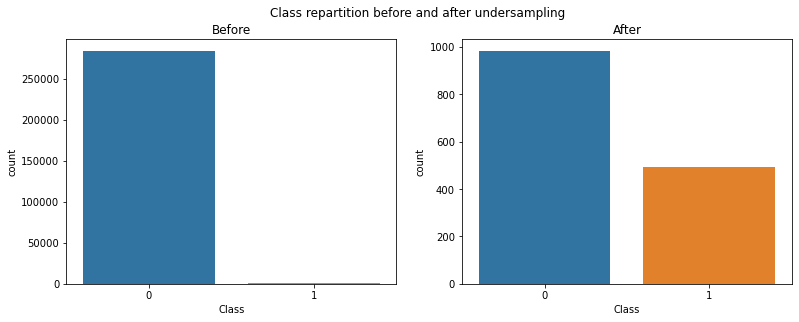

In [104]:
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=cd, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

In [106]:
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [107]:
model = SVC()

In [108]:
#train the model
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)

In [109]:
#predictions
y_pred_svm = model2.predict(X_test)

In [110]:
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))


Accuracy SVM: 0.6351351351351351
Precision SVM: 0.0
Recall SVM: 0.0
F1 Score SVM: 0.0


C:\Users\Abhiram\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


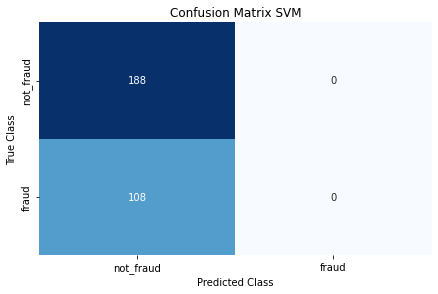

In [111]:
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [112]:
#AUC
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)
print("AUC SVM :", auc_svm)

AUC SVM : 0.573827817178881


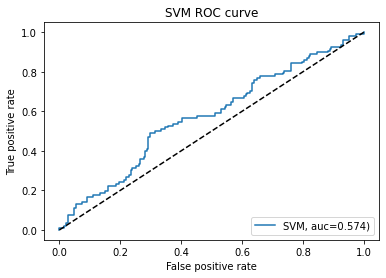

In [113]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

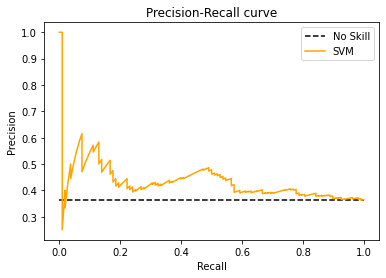

In [114]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [115]:
fraud_counts = cd['Class'].value_counts()
print(fraud_counts)

0    284315
1       492
Name: Class, dtype: int64


<Figure size 864x432 with 0 Axes>

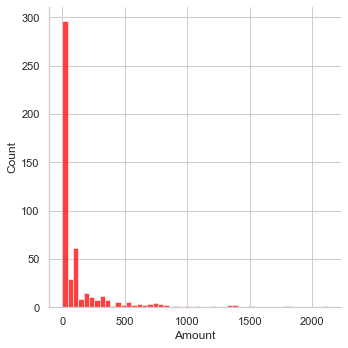

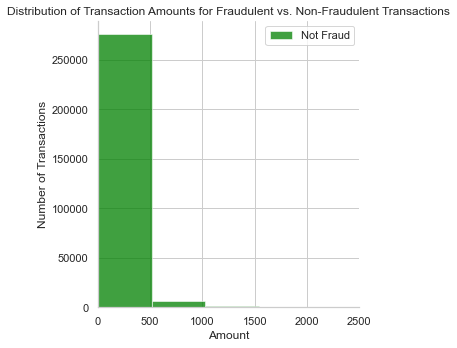

In [116]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a plot
plt.figure(figsize=(12, 6))

# Plot the distribution of the 'Amount' for fraudulent transactions
sns.displot(cd[cd['Class'] == 1]['Amount'], bins=50, label='Fraud', kde=False, color='red')

# Plot the distribution of the 'Amount' for non-fraudulent transactions
sns.displot(cd[cd['Class'] == 0]['Amount'], bins=50, label='Not Fraud', kde=False, color='green')

plt.title('Distribution of Transaction Amounts for Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.legend()
plt.xlim([0, 2500])  # Limiting x-axis to 2500 for better visualization, as there might be some outliers
plt.tight_layout()
plt.show()

In [117]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [118]:
#checking the number of frauds and valid transactions

Fraud = cd[cd['Class']==1]
Valid = cd[cd['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [119]:
#creating dependent and independent features
columns = cd.columns.tolist()
#Filtering the columns to remove the data
columns = [c for c in columns if c not in ["Class"]]
#alocating variable we are predicting
target = "Class"
#Defining a random state
state = np.random.RandomState(42)
X = cd[columns]
Y = cd[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [120]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=5, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=20, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                         max_iter=-1)
   
}

In [121]:
type(classifiers)

dict

In [ ]:
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    #Fitting the data and tagging outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        y_pred = clf.predict(X)
    else:
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        y_pred = clf.predict(X)
    #Reshaping the prediction values to 0 for Valid transaction, 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != Y).sum()
    #Running Classifcation metrics
    print("{}: {}".format(clf_name,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(Y, y_pred))
    print("Classification Report :")
    print(classification_report(Y,y_pred))

Isolation Forest: 697
Accuracy Score :
0.9975527286899549
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.29      0.29       492

    accuracy                           1.00    284807
   macro avg       0.65      0.65      0.65    284807
weighted avg       1.00      1.00      1.00    284807

Local Outlier Factor: 935
Accuracy Score :
0.9967170750718908
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.05      0.05      0.05       492

    accuracy                           1.00    284807
   macro avg       0.52      0.52      0.52    284807
weighted avg       1.00      1.00      1.00    284807



In [ ]:
 print("{}: {}".format(clf_fit,n_errors))
    print("Accuracy Score :")
    print(accuracy_score(X, y_pred))
    print("Classification Report :")
    print(classification_report(X,y_pred))

In [ ]:
# scaling Time and Amount 
from sklearn.preprocessing import StandardScaler
cd["Amount"]= StandardScaler().fit_transform(cd["Amount"].values.reshape(-1, 1))
cd["Time"]= StandardScaler().fit_transform(cd["Time"].values.reshape(-1, 1))

In [ ]:
cd[["Time","Amount"]].describe()

In [ ]:
X=cd.drop("Class", axis=1)
y=cd["Class"].values.reshape(-1,1)

In [99]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [100]:
from sklearn.model_selection import train_test_split
X_train_resampled,X_test,y_train_resampled,y_test= train_test_split(X_resampled,y_resampled)

In [101]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred=model.predict(X_test)

In [102]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     70793
           1       0.97      0.92      0.94     70834

    accuracy                           0.95    141627
   macro avg       0.95      0.95      0.95    141627
weighted avg       0.95      0.95      0.95    141627



In [103]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9455481617818954

In [104]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.9720315280956013
0.9175113645989215


In [105]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred)

0.9439848941501144

In [106]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_resampled, y_train_resampled)
y_pred2 = sgd_clf.predict(X_test)

In [107]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred2)

0.9458511487074086

In [108]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))

0.9701941400666985
0.9199819295818392


In [109]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred2)

0.9444210953464444

In [110]:
X = data.drop('Class', axis=1)
Y = data['Class']

In [111]:
X.shape

(283726, 30)

In [112]:
Y.shape

(283726,)

In [113]:
 # You can specify a random state for reproducibility
smote = SMOTE(random_state=42) 
x_smote, y_smote = smote.fit_resample(X, Y)

In [114]:
y_smote.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [115]:
print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 283253, 1: 473})
Resample dataset shape Counter({0: 283253, 1: 283253})


In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(x_smote, y_smote, test_size=0.20, random_state=42)

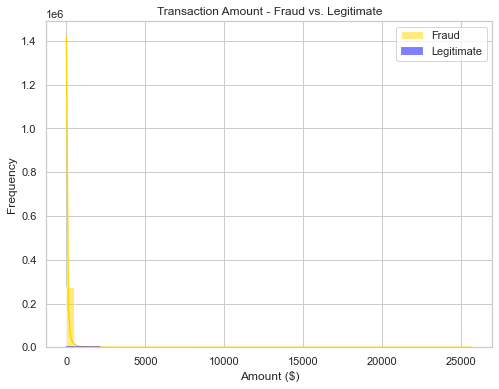

In [117]:
fraud_data = data[data['Class'] == 0]
legitimate_data = data[data['Class'] == 1]
plt.figure(figsize=(8, 6))
plt.title("Transaction Amount - Fraud vs. Legitimate")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
sns.histplot(fraud_data['Amount'], bins=50, kde=True, color="gold", label="Fraud")
sns.histplot(legitimate_data['Amount'], bins=50, kde=True, color="blue", label="Legitimate")
plt.legend()
plt.show()

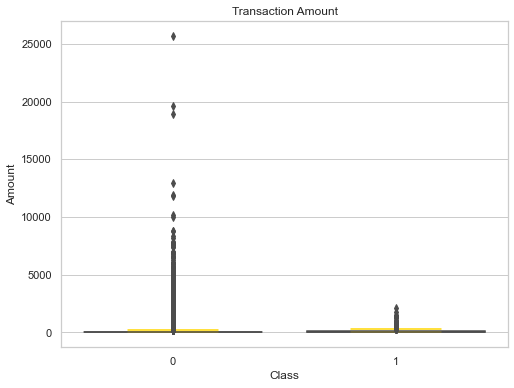

In [118]:
plt.figure(figsize=(8, 6))
plt.title("Transaction Amount")
sns.boxplot(x="Class", y="Amount", data=data, boxprops=dict(facecolor="blue"), whiskerprops=dict(color="gold"), capprops=dict(color="gold"))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

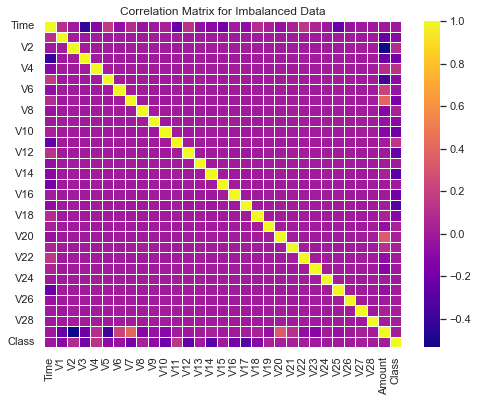

In [121]:
corr_imbalanced = cd.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_imbalanced, annot=False, cmap="plasma", linewidths=0.5)
plt.title("Correlation Matrix for Imbalanced Data")
plt.show

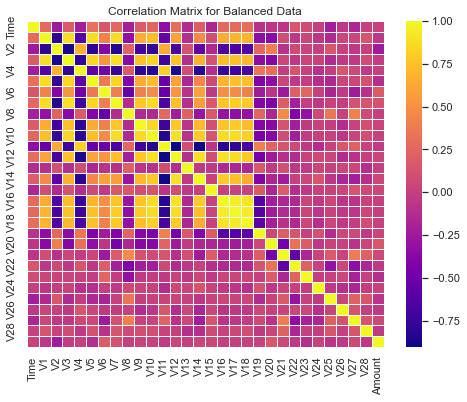

In [122]:
corr_balanced = x_smote.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_balanced, annot=False, cmap="plasma", linewidths=0.5)
plt.title("Correlation Matrix for Balanced Data")
plt.show()

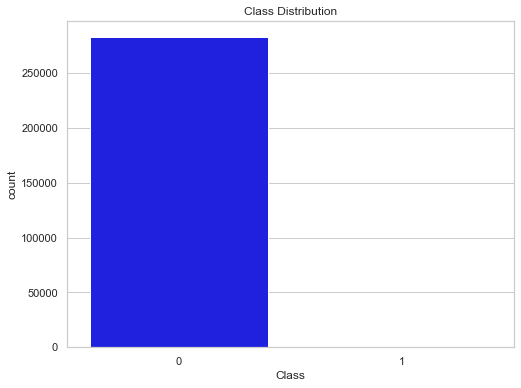

In [123]:
custom_palette = sns.color_palette(["blue", "gold"])
plt.figure(figsize=(8, 6))
sns.countplot(x="Class", data=data, palette=custom_palette)
plt.title("Class Distribution")
plt.show()

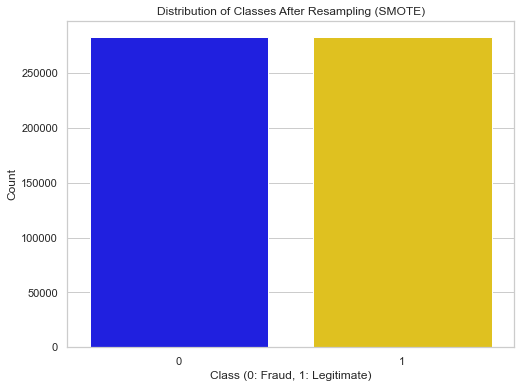

In [124]:
custom_palette = sns.color_palette(["blue", "gold"])
plt.figure(figsize=(8, 6))
sns.countplot(x=y_smote, palette=custom_palette)
plt.title("Distribution of Classes After Resampling (SMOTE)")
plt.xlabel("Class (0: Fraud, 1: Legitimate)")
plt.ylabel("Count")
plt.show()

In [125]:
# Build the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, Y_train)

C:\Users\vivek vardhan reddy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [126]:
Y_pred_logistic = logistic_model.predict(X_test)

In [127]:
transaction_data = pd.DataFrame({
    'Time': [16],
    'V1': [1.322707269],
    'V2': [-0.174040833],
    'V3': [0.434555031],
    'V4': [0.576037652],
    'V5': [-0.836758046],
    'V6': [-0.831083411],
    'V7': [-0.264904961],
    'V8': [-0.220981943],
    'V9': [-1.071424618],
    'V10': [0.868558548],
    'V11': [-0.64150629],
    'V12': [-0.111315775],
    'V13': [0.36148541],
    'V14': [0.171945122],
    'V15': [0.782166532],
    'V16': [-1.35587073],
    'V17': [-0.216935153],
    'V18': [1.271765385],
    'V19': [-1.240621935],
    'V20': [-0.522950941],
    'V21': [-0.284375572],
    'V22': [-0.323357411],
    'V23': [-0.037709905],
    'V24': [0.347150939],
    'V25': [0.559639137],
    'V26': [-0.280158166],
    'V27': [0.042335258],
    'V28': [0.0288223],
    'Amount': [0],
    'Class': [0]  
})

new_predictions = logistic_model.predict(transaction_data.drop(columns=['Class']))

if new_predictions[0] == 1:
    print("Time: 16\nPredict: Fraudulent Transaction")
else:
    print("Time: 16\nPredict: Genuine Transaction")

Time: 16
Predict: Fraudulent Transaction


In [128]:
# Define the minimum and maximum 'Time' values from your training data
min_time = data['Time'].min()
max_time = data['Time'].max()

random_transactions = []

# Generate 28 random transactions
for _ in range(28):
    new_transaction = {
        'Time': np.random.uniform(min_time, max_time), 
        'Amount': np.random.uniform(0, 500),
        'V1': np.random.uniform(-2, 2),
        'V2': np.random.uniform(-2, 2),
        'V3': np.random.uniform(-2, 2),
        'V4': np.random.uniform(-2, 2),
        'V5': np.random.uniform(-2, 2),
        'V6': np.random.uniform(-2, 2),
        'V7': np.random.uniform(-2, 2),
        'V8': np.random.uniform(-2, 2),
        'V9': np.random.uniform(-2, 2),
        'V10': np.random.uniform(-2, 2),
        'V11': np.random.uniform(-2, 2),
        'V12': np.random.uniform(-2, 2),
        'V13': np.random.uniform(-2, 2),
        'V14': np.random.uniform(-2, 2),
        'V15': np.random.uniform(-2, 2),
        'V16': np.random.uniform(-2, 2),
        'V17': np.random.uniform(-2, 2),
        'V18': np.random.uniform(-2, 2),
        'V19': np.random.uniform(-2, 2),
        'V20': np.random.uniform(-2, 2),
        'V21': np.random.uniform(-2, 2),
        'V22': np.random.uniform(-2, 2),
        'V23': np.random.uniform(-2, 2),
        'V24': np.random.uniform(-2, 2),
        'V25': np.random.uniform(-2, 2),
        'V26': np.random.uniform(-2, 2),
        'V27': np.random.uniform(-2, 2),
        'V28': np.random.uniform(-2, 2),
    }
    random_transactions.append(new_transaction)


random_data = pd.DataFrame(random_transactions, columns=X_train.columns)  # Use the same feature order
random_predictions = logistic_model.predict(random_data)

for i, prediction in enumerate(random_predictions):
    if prediction == 0:
        print(f"Transaction {i + 1}: Genuine Transaction")
    else:
        print(f"Transaction {i + 1}: Fraudulent Transaction")

Transaction 1: Genuine Transaction
Transaction 2: Genuine Transaction
Transaction 3: Genuine Transaction
Transaction 4: Genuine Transaction
Transaction 5: Genuine Transaction
Transaction 6: Genuine Transaction
Transaction 7: Genuine Transaction
Transaction 8: Genuine Transaction
Transaction 9: Genuine Transaction
Transaction 10: Genuine Transaction
Transaction 11: Genuine Transaction
Transaction 12: Fraudulent Transaction
Transaction 13: Genuine Transaction
Transaction 14: Genuine Transaction
Transaction 15: Genuine Transaction
Transaction 16: Genuine Transaction
Transaction 17: Genuine Transaction
Transaction 18: Fraudulent Transaction
Transaction 19: Genuine Transaction
Transaction 20: Genuine Transaction
Transaction 21: Genuine Transaction
Transaction 22: Genuine Transaction
Transaction 23: Genuine Transaction
Transaction 24: Genuine Transaction
Transaction 25: Genuine Transaction
Transaction 26: Genuine Transaction
Transaction 27: Fraudulent Transaction
Transaction 28: Genuine Tran

In [129]:
# Calculate performance metrics for the Logistic Regression model
confusion_matrix_logistic = confusion_matrix(Y_test, Y_pred_logistic)
classification_report_logistic = classification_report(Y_test, Y_pred_logistic, output_dict=True)

confusion_matrix_df = pd.DataFrame(confusion_matrix_logistic, 
                                   columns=["Predicted Negative (0)", "Predicted Positive (1)"],
                                   index=["Actual Negative (0)", "Actual Positive (1)"])

classification_report_df = pd.DataFrame(classification_report_logistic)

print("Logistic Regression Model - Confusion Matrix:")
print(confusion_matrix_df)

print("\nLogistic Regression Model - Classification Report:")
print(classification_report_df)

Logistic Regression Model - Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                   55227                    1236
Actual Positive (1)                    2114                   54725

Logistic Regression Model - Classification Report:
                      0             1  accuracy      macro avg   weighted avg
precision      0.963133      0.977913  0.970433       0.970523       0.970548
recall         0.978110      0.962807  0.970433       0.970458       0.970433
f1-score       0.970563      0.970301  0.970433       0.970432       0.970432
support    56463.000000  56839.000000  0.970433  113302.000000  113302.000000


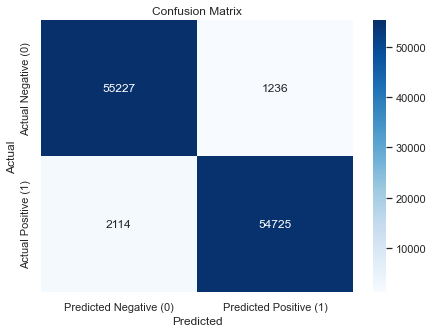

In [130]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix_df, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

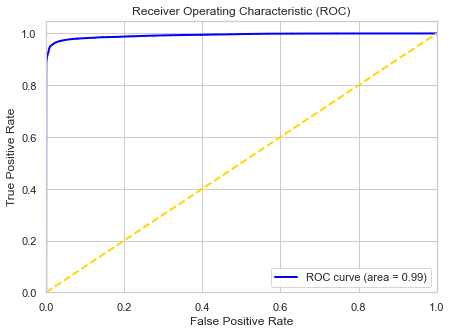

In [131]:
from sklearn.metrics import roc_curve, auc
y_scores = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gold', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

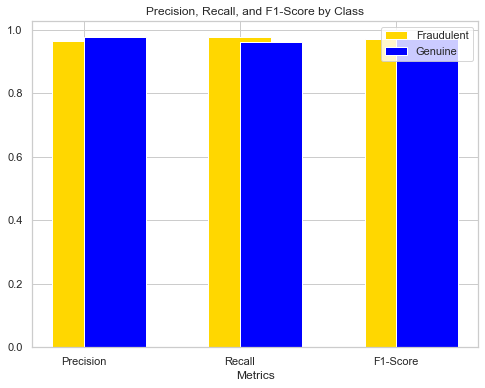

In [132]:
fraud_metrics = [classification_report_df['0']['precision'], classification_report_df['0']['recall'], classification_report_df['0']['f1-score']]
legitimate_metrics = [classification_report_df['1']['precision'], classification_report_df['1']['recall'], classification_report_df['1']['f1-score']]

metrics_labels = ['Precision', 'Recall', 'F1-Score']
x = range(len(metrics_labels))

plt.figure(figsize=(8, 6))
plt.bar(x, fraud_metrics, width=0.4, label='Fraudulent', align='center', color='gold')
plt.bar(x, legitimate_metrics, width=0.4, label='Genuine', align='edge', color='blue')
plt.xlabel('Metrics')
plt.xticks(x, metrics_labels)
plt.title("Precision, Recall, and F1-Score by Class")
plt.legend()
plt.show()